In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
housing = pd.read_csv('housing.csv')
housing.shape

(20640, 10)

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

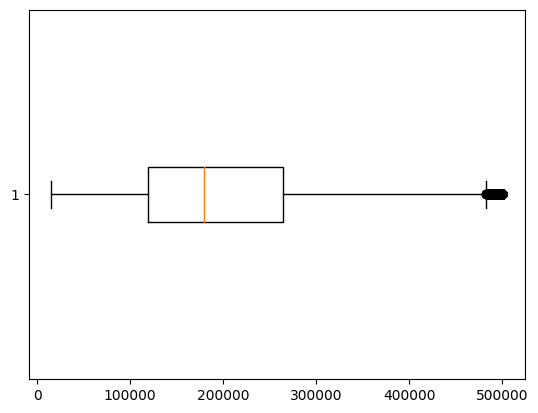

In [5]:
plt.boxplot(housing['median_house_value'], vert=False)
plt.show()

<AxesSubplot: xlabel='total_bedrooms', ylabel='Count'>

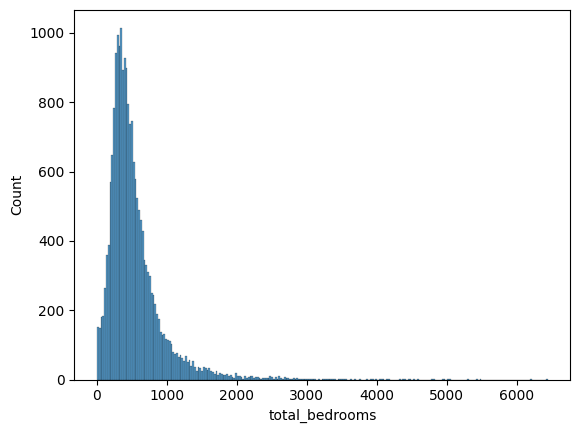

In [6]:
sns.histplot(housing.total_bedrooms)

In [7]:
housing = housing[[
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]]

housing.shape

(20640, 9)

In [8]:
housing.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [9]:
housing.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [10]:
housing.population.median()

1166.0

In [11]:
n = len(housing)

In [12]:
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_val-n_test  

In [13]:
n == n_train + n_val + n_test  

True

In [14]:
idx=np.arange(n)
idx

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [15]:
np.random.seed(42)
np.random.shuffle(idx)
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [40]:
df_train = housing.iloc[idx[:n_train]].drop(columns=['median_house_value']).reset_index(drop=True)
df_val = housing.iloc[idx[n_train:n_train+n_val]].drop(columns=['median_house_value']).reset_index(drop=True)
df_test = housing.iloc[idx[n_train+n_val:]].drop(columns=['median_house_value']).reset_index(drop=True)

In [41]:
y_train = np.log1p(housing.iloc[idx[:n_train],].median_house_value.values)
y_val = np.log1p(housing.iloc[idx[n_train:n_train+n_val]].median_house_value.values)
y_test = np.log1p(housing.iloc[idx[n_train+n_val:]].median_house_value.values)

In [42]:
print(len(y_val) == len(df_val))
print(len(y_test) == len(df_test))
print(len(y_train) == len(df_train))

True
True
True


In [43]:
total_bed_mean = df_train['total_bedrooms'].mean()
total_bed_mean

541.6202707110241

In [44]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]



def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [45]:
X_train = df_train.copy()

In [46]:
X_train['total_bedrooms'] = X_train['total_bedrooms'].fillna(0)

In [47]:
X_train['total_bedrooms'] .describe()

count    12384.000000
mean       536.372012
std        424.855848
min          0.000000
25%        293.000000
50%        434.000000
75%        649.250000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [48]:
W_0, W = train_linear_regression(X_train, y_train)
W_0

-11.459046830793762

In [49]:
y_pred = W_0 + X_train.dot(W)

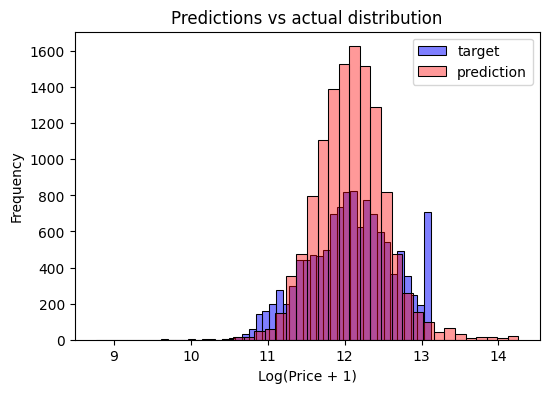

In [50]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='blue', alpha=0.5, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.4, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [51]:
round(rmse(y_train, y_pred),2)

0.34

In [52]:
X_train = df_train.copy()

In [53]:
X_train['total_bedrooms'] = X_train['total_bedrooms'].fillna(total_bed_mean)

In [54]:
X_train['total_bedrooms'].describe()

count    12384.000000
mean       541.620271
std        421.529650
min          1.000000
25%        298.000000
50%        440.000000
75%        649.250000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [55]:
W_0, W = train_linear_regression(X_train, y_train)

In [56]:
y_pred = W_0 + X_train.dot(W)
W_0

-11.536506897854355

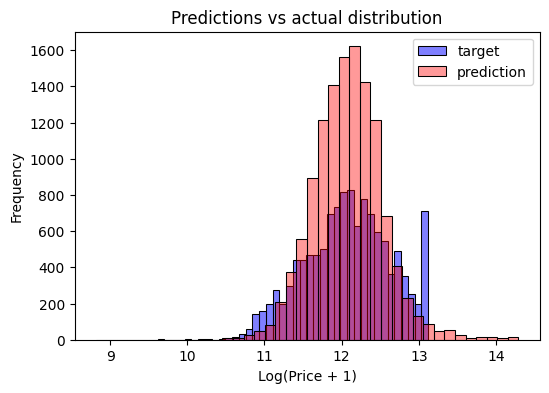

In [57]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='blue', alpha=0.5, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.4, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [58]:
round(rmse(y_train, y_pred),2)

0.34

In [59]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [60]:
X_train = df_train.copy()
X_train['total_bedrooms'] = X_train['total_bedrooms'].fillna(0)
X_val = df_val.copy()
X_val['total_bedrooms'] = X_val['total_bedrooms'].fillna(0)


for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_train.dot(w)
    print('%6s' %r, w_0, rmse(y_train, y_pred))
    y_pred = w_0 + X_val.dot(w)
    print('val', rmse(y_val, y_pred))

     0 -11.459046830793762 0.3409703957284104
val 0.33659261241904254
 1e-06 -11.459031377912467 0.3409703957284315
val 0.3365926118952892
0.0001 -11.457501750493533 0.34097039593813017
val 0.3365925602650532
 0.001 -11.44361475048918 0.34097041664957933
val 0.3365921097086795
  0.01 -11.30657360163033 0.34097243804423527
val 0.3365894179960646
   0.1 -10.097341975384653 0.3411332500467885
val 0.33670374520098756
     1 -4.878283028044792 0.34475383541131505
val 0.3400258688362358
     5 -1.477789775444887 0.34961287667138763
val 0.3446117157605363
    10 -0.7885673331385608 0.3508302771217229
val 0.345768571820661


In [62]:
metric=[]
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx=np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_train = housing.iloc[idx[:n_train]].drop(columns=['median_house_value']).reset_index(drop=True)
    df_val = housing.iloc[idx[n_train:n_train+n_val]].drop(columns=['median_house_value']).reset_index(drop=True)
    df_test = housing.iloc[idx[n_train+n_val:]].drop(columns=['median_house_value']).reset_index(drop=True)
    
    y_train = np.log1p(housing.iloc[idx[:n_train],].median_house_value.values)
    y_val = np.log1p(housing.iloc[idx[n_train:n_train+n_val]].median_house_value.values)
    y_test = np.log1p(housing.iloc[idx[n_train+n_val:]].median_house_value.values)
    
    X_train = df_train.copy()
    X_train['total_bedrooms'] = X_train['total_bedrooms'].fillna(0)
    X_val = df_val.copy()
    X_val['total_bedrooms'] = X_val['total_bedrooms'].fillna(0)

    w_0, w = train_linear_regression(X_train, y_train)
#     y_pred = w_0 + X_train.dot(w)
#     print('%6s' %r, w_0, rmse(y_train, y_pred))
    y_pred = w_0 + X_val.dot(w)
    metric.append(rmse(y_val, y_pred))
    print('val', s , rmse(y_val, y_pred))

val 0 0.33884304805303195
val 1 0.33623872559566237
val 2 0.33209123188331624
val 3 0.3405153609037783
val 4 0.3389024066574298
val 5 0.34348667257187326
val 6 0.3451980953099157
val 7 0.3395989927407543
val 8 0.3466230873199136
val 9 0.33659261241904254


In [66]:
round(np.std(metric),3)

0.004

In [70]:
idx=np.arange(n)
np.random.seed(9)
np.random.shuffle(idx) 

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

# df_val = housing.iloc[idx[:n_val]].drop(columns=['median_house_value']).reset_index(drop=True)
# df_test = housing.iloc[idx[n_val:n_val+n_test]].drop(columns=['median_house_value']).reset_index(drop=True)
# df_train = housing.iloc[idx[n_val+n_test:]].drop(columns=['median_house_value']).reset_index(drop=True)

df_train = housing.iloc[idx[:n_train]].drop(columns=['median_house_value']).reset_index(drop=True)
df_val = housing.iloc[idx[n_train:n_train+n_val]].drop(columns=['median_house_value']).reset_index(drop=True)
df_test = housing.iloc[idx[n_train+n_val:]].drop(columns=['median_house_value']).reset_index(drop=True)


# df_shuffled = housing.iloc[idx]

# df_train = df_shuffled.iloc[:n_train].copy()
# df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
# df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train = np.log1p(housing.iloc[idx[:n_train],].median_house_value.values)
y_val = np.log1p(housing.iloc[idx[n_train:n_train+n_val]].median_house_value.values)
y_test = np.log1p(housing.iloc[idx[n_train+n_val:]].median_house_value.values)

# y_train_orig = df_train.median_house_value.values
# y_val_orig = df_val.median_house_value.values
# y_test_orig = df_test.median_house_value.values

# y_train = np.log1p(df_train.median_house_value.values)
# y_val = np.log1p(df_val.median_house_value.values)
# y_test = np.log1p(df_test.median_house_value.values)

# del df_train['median_house_value']
# del df_val['median_house_value']
# del df_test['median_house_value']

df_train = pd.concat([df_val, df_train])
y_train = np.append( y_val , y_train )

X_train = df_train.copy()
X_train['total_bedrooms'] = X_train['total_bedrooms'].fillna(0)
X_val = df_val.copy()
X_val['total_bedrooms'] = X_val['total_bedrooms'].fillna(0)
X_test = df_val.copy()
X_test['total_bedrooms'] = X_test['total_bedrooms'].fillna(0)

w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
#     y_pred = w_0 + X_train.dot(w)
#     print('%6s' %r, w_0, rmse(y_train, y_pred))
y_pred = w_0 + X_test.dot(w)
print('val', s , rmse(y_test, y_pred))

val 9 0.7301247804627284
